In [1]:
import os.path as osp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [2]:
df = pd.read_csv("task1.csv")
df.head()

,n,const_f,sum_f,prod_f,direct_poly,horners_poly,sort.bubblesort.sort,sort.quicksort.sort,sort.timsort.sort,matrix_mult
0,1,3.625000e-07,0.000011,0.000010,0.000002,0.000002,7.750000e-07,7.714286e-07,0.000002,0.000002
1,2,3.125000e-07,0.000011,0.000010,0.000002,0.000002,1.212500e-06,3.987500e-06,0.000003,0.000003
2,3,3.125000e-07,0.000011,0.000010,0.000002,0.000002,1.787500e-06,5.075000e-06,0.000005,0.000004
3,4,3.000000e-07,0.000011,0.000011,0.000002,0.000002,2.483333e-06,6.887500e-06,0.000006,0.000003
4,5,3.125000e-07,0.000011,0.000011,0.000002,0.000003,3.112500e-06,8.587500e-06,0.000008,0.000004


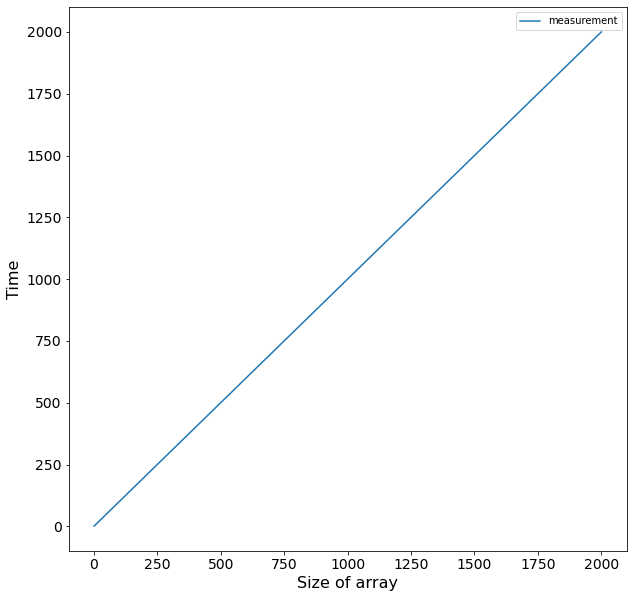

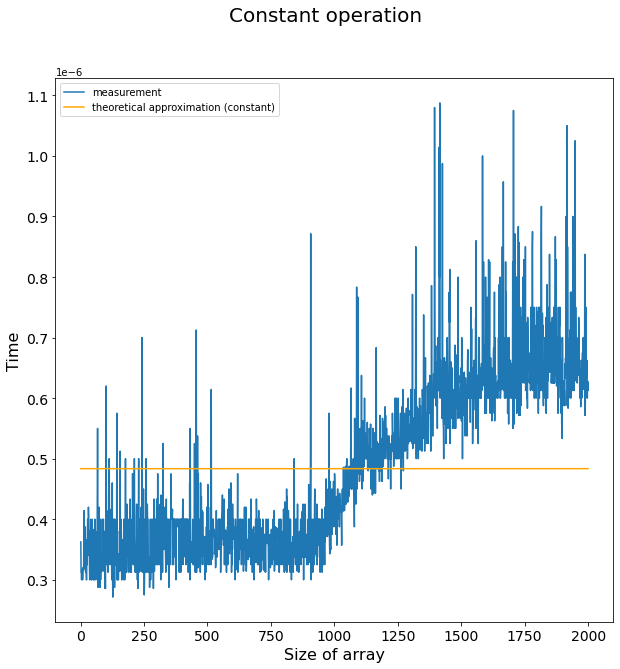

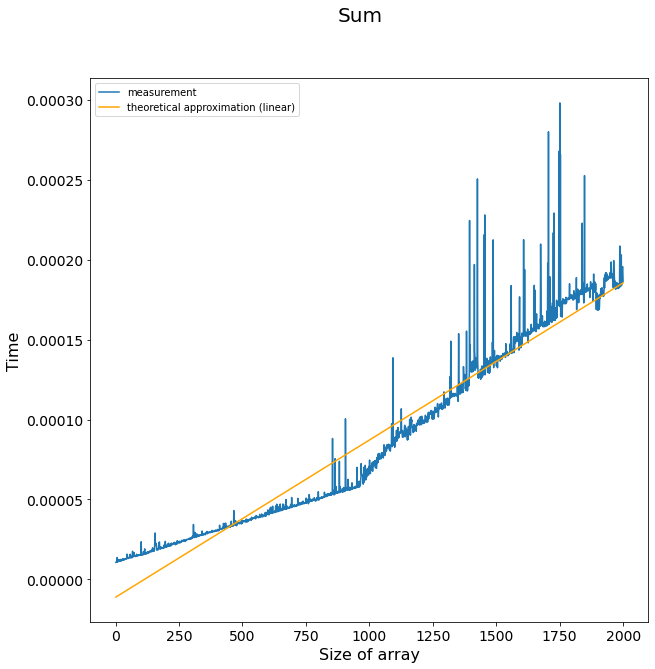

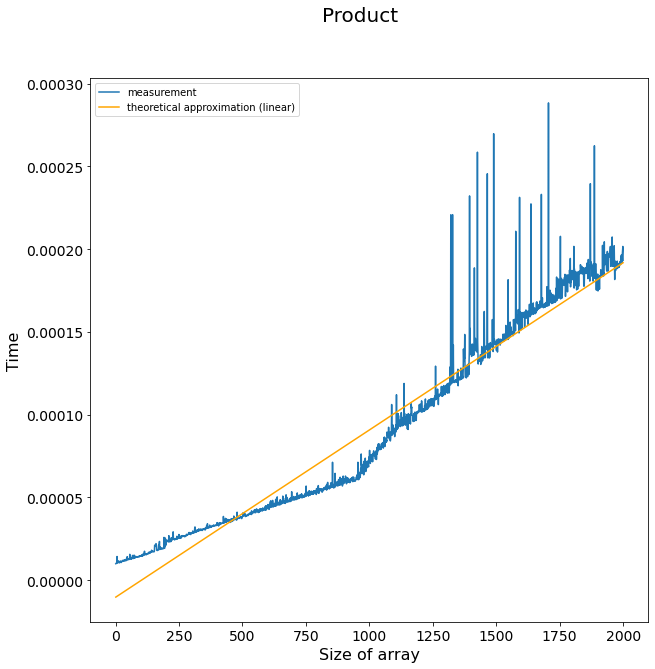

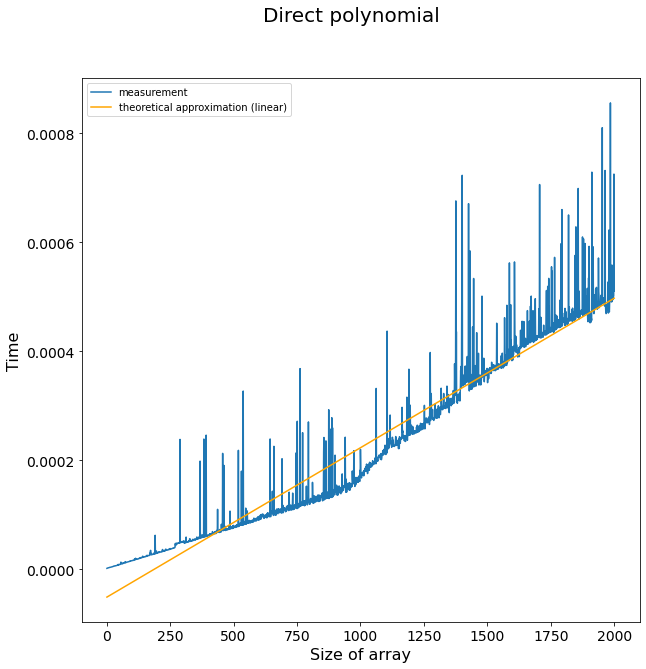

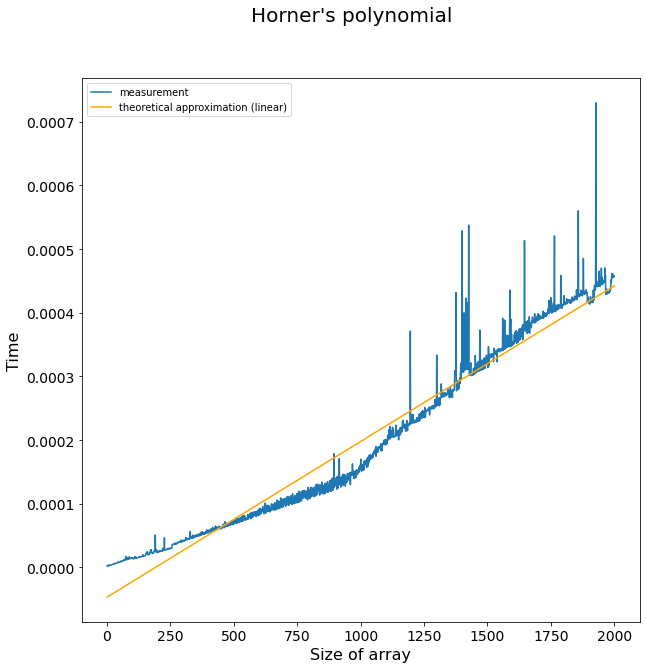

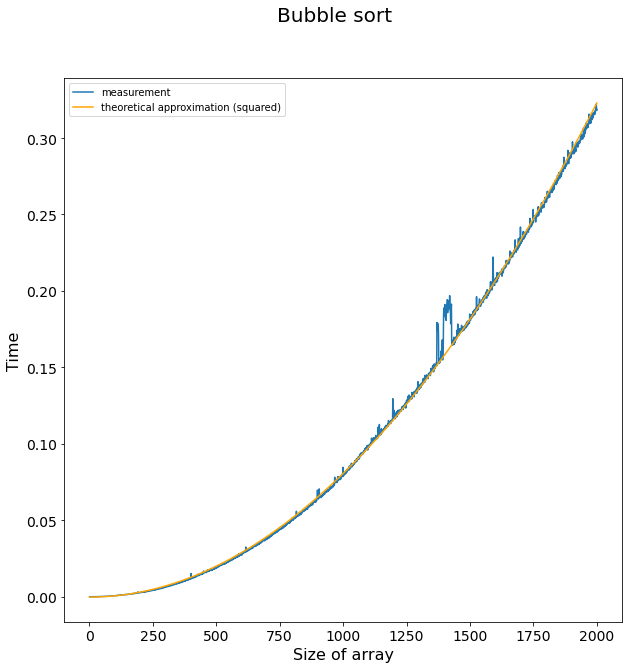

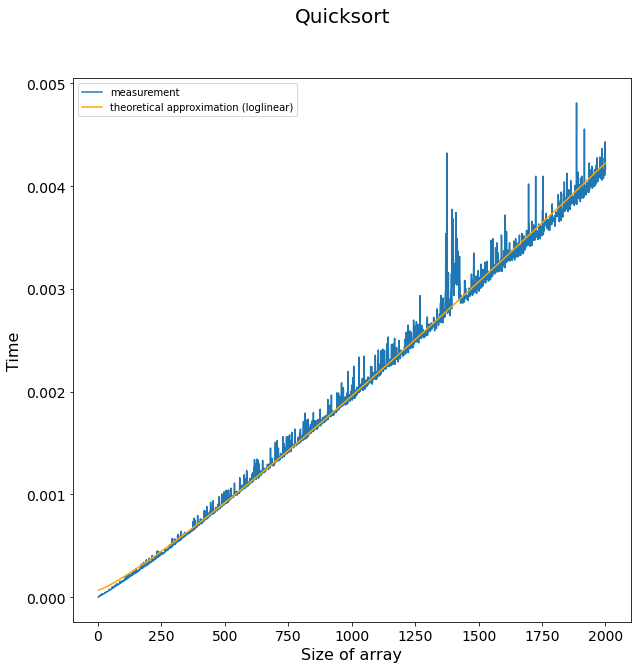

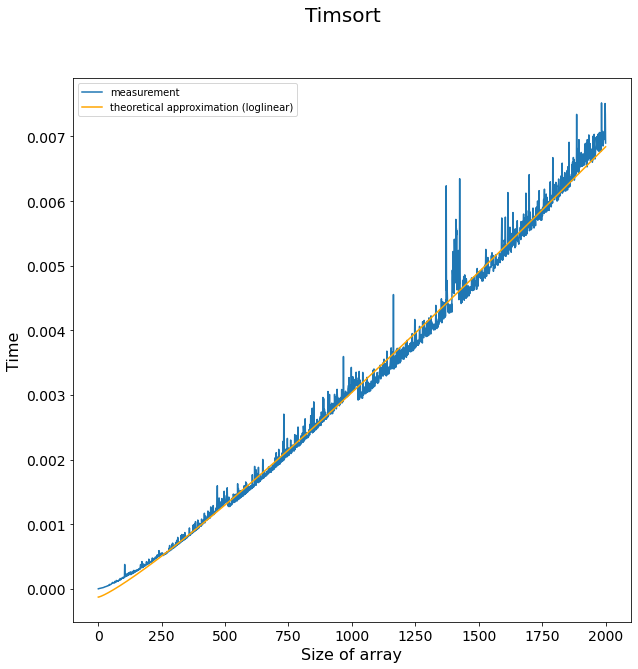

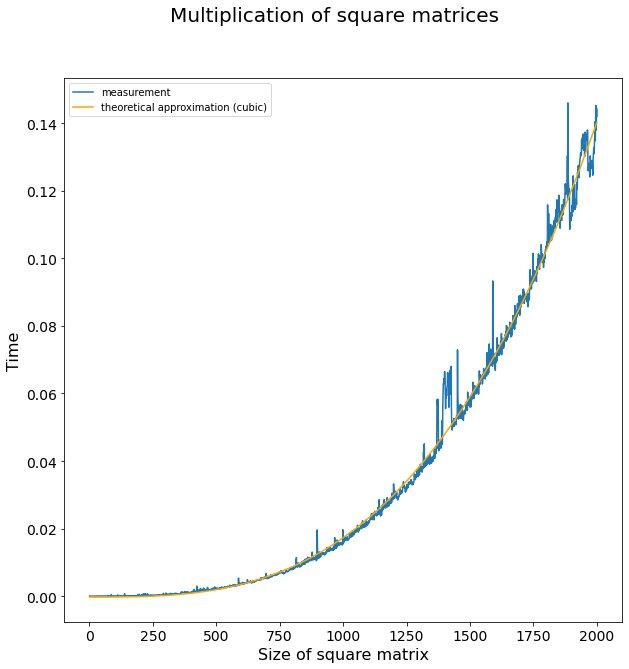

In [3]:
COLUMN_NAMES = {
    "n": None,
    "const_f": "Constant operation",
    "sum_f": "Sum",
    "prod_f": "Product",
    "direct_poly": "Direct polynomial",
    "horners_poly": "Horner's polynomial",
    "sort.bubblesort.sort": "Bubble sort",
    "sort.quicksort.sort": "Quicksort",
    "sort.timsort.sort": "Timsort",
    "matrix_mult": "Multiplication of square matrices"
}

for colname in df.columns:
    plt.figure(figsize=(10, 10))
    plt.plot(df['n'], df[colname], label='measurement')
    
    plt.ylabel('Time', fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    
        
    if colname == 'const_f':
        label = 'constant'
        coeffs = np.polyfit(x=df['n'], y=df[colname], deg=0)
        theor = np.full_like(df['n'], coeffs[0], dtype=np.float64)
    elif colname in ['sum_f', 'prod_f', 'direct_poly', 'horners_poly']:
        label = 'linear'
        coeffs = np.polyfit(x=df['n'], y=df[colname], deg=1)
        theor = coeffs[0] * df['n'] + coeffs[1]
    elif colname in ['sort.quicksort.sort', 'sort.timsort.sort']:
        label = 'loglinear'
        coeffs = np.polyfit(x=np.log(df['n']) * df['n'], y=df[colname], deg=1)
        theor = coeffs[0] * np.log(df['n']) * df['n'] + coeffs[1]
    elif colname == 'sort.bubblesort.sort':
        label = 'squared'
        coeffs = np.polyfit(x=df['n'] ** 2, y=df[colname], deg=1)
        theor = coeffs[0] * df['n'] ** 2 + coeffs[1]
    
    if colname == 'matrix_mult':
        plt.xlabel('Size of square matrix', fontsize=16)
        coeffs = np.polyfit(x=df['n'] ** 3, y=df[colname], deg=1)
        theor = coeffs[0] * df['n'] ** 3 + coeffs[1]
        label = 'cubic'
    else:
        plt.xlabel('Size of array', fontsize=16)

    if colname != 'n':
        plt.plot(df['n'], theor, label=f'theoretical approximation ({label})', c='orange')
    
    plt.suptitle(COLUMN_NAMES[colname], fontsize=20)
    plt.legend()
    plt.show()